In [69]:
# Import Dependencies
import json
import tweepy 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time 

In [70]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [71]:
# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [72]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [73]:
# News Organization accounts 
news_organizations = "@CNN", "@BBC", "@CBS", "@FoxNews", "@nytimes"

# Variables for holding sentiments and setting counter
sentiments = []
counter = 1 

# Loop through tweets
for organization in news_organizations:
    tweet_number = 1

    # Get all tweets from home feed
    public_tweets = api.user_timeline(organization, count=100)

    # Loop through all tweets
    for tweet in public_tweets:
        print("Tweet %s: %s" % (counter, tweet["text"]))

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        #Append into sentiment  
        sentiments.append({"Tweets Ago": tweet_number,
                          "Media Sources": organization,
                          "Text":tweet["text"],
                          "Date": tweet["created_at"],
                          "Compound": compound,
                          "Positive": pos,
                          "Neutral": neu,
                          "Negative": neg,
                           })
        tweet_number +=1
        counter +=1

Tweet 1: Designing for hedonists: The evolution of nightclub interiors https://t.co/WzAKmgoAGR via @CNNStyle https://t.co/c1JMgQI6b1
Tweet 2: Stormy Daniels' attorney has once again filed a motion to depose President Donald Trump and his lawyer, Michael Coh… https://t.co/L3hMkc6fPH
Tweet 3: Beyond Tokyo: 8 of Japan's best foodie destinations https://t.co/IDp7V1mQZt via @CNNTravel https://t.co/FAQXM3gwdH
Tweet 4: Jimmy Kimmel apologizes for jabs at Fox News host Sean Hannity https://t.co/EPIZTD4nhI https://t.co/UOB2GCuJTS
Tweet 5: Cambridge Analytica whistleblower says data could've come from more than 87 million users and be stored in Russia… https://t.co/Ej1Tue15bq
Tweet 6: New Trump adviser is "not much of a carrot man" https://t.co/Z53CxQc8cE | via @CNNopinion https://t.co/RRtck6hC7Z
Tweet 7: "Fittest woman on earth" wins gold medal after family tragedy https://t.co/tn9oLryfxc https://t.co/oQe1NTxvTS
Tweet 8: This 16-year-old from India won the 10-meter air pistol competition despit

Tweet 101: 😺💦 This is Maya the jaguar's very first swim!  
#BigCatsAboutTheHouse https://t.co/IacZP3ltf3
Tweet 102: 😂 Need a hand getting the kids to bed? https://t.co/JAUkyoVSA8
Tweet 103: 'Silencing masks' and 'wife auctions': What life used to be like for women. 
👉 https://t.co/7Z1bcXKgOx https://t.co/gzm7Hf3loH
Tweet 104: 🦖😂 Philomena Cunk examines the barbaric conditions in which we keep today's dinosaurs.
#CunkOnBritain  https://t.co/nBav5dqh7a
Tweet 105: RT @bbcgetinspired: Meet Sue...

She is planning to run the 2018 @LondonMarathon to prove someone with vascular dementia can do it. 🙌

➡ ht…
Tweet 106: 🎨 Victoria Lomasko is a Russian graphic artist who's travelled up and down her country painting 'forgotten women'. https://t.co/XtlpBlAYb0
Tweet 107: 🎶 The search for the next Young Musician has begun, and the first @BBCYoungMus semi-finalist of 2018 has been confi… https://t.co/klUA4GWtb0
Tweet 108: 'If boys are getting diagnosed with autism, girls need exactly the same.' https:

Tweet 201: It's time to celebrate! @MomCBS will be back for Season 6! https://t.co/ianxp6JWHq
Tweet 202: @OldDominion's Matthew Ramsey is here with a friendly reminder - Country Music’s Party Of The Year® is just seven d… https://t.co/SFnXxQLoPN
Tweet 203: It all comes down to this! Stream Round 4 of #TheMasters Tournament on CBS live with a free trial of CBS All Access… https://t.co/mNFSAUkLvZ
Tweet 204: @reba is ready for her hosting duties! In just one week, watch her take the stage at the 53rd #ACMawards. Tune in A… https://t.co/TmjezmqPme
Tweet 205: Watch some of the biggest names in golf compete in one of the greatest tournaments of the year! Stream #TheMasters… https://t.co/e8kbkSLx5k
Tweet 206: Tonight's the night! Here's a behind-the-scenes look at season 2 of @RansomCBS before the big premiere. Tune in at… https://t.co/WtRHvufO7H
Tweet 207: What song will @DierksBentley belt out when he takes the stage to perform at the 53rd #ACMawards? Get ready to sing… https://t.co/oEtKJnK

Tweet 301: OPINION: Divorce is an epidemic that causes as much pain as any disease -- so why don't we treat it that way? https://t.co/4hpTBLlxJ6
Tweet 302: .@TomiLahren on the state of the GOP: "Why is it always the Right that has to become more moderate? No, I don't thi… https://t.co/pDaOwjuF8d
Tweet 303: .@Schwarzenegger: "California is coming back economically right now...and hopefully we get to this four percent tha… https://t.co/CZ8rWrluqT
Tweet 304: .@TomiLahren on immigration debate: "Americans are going to be safe in the United States of America.… https://t.co/z8AwlkO3ch
Tweet 305: .@AntonioSabatoJr on immigration debate: "The Democratic Party is always saying, 'well if you want a border, if you… https://t.co/eErO7mcoM7
Tweet 306: Earlier, @MayorofLondon Sadiq Khan decried the uptick in stabbings that have raised London's homicide rate higher t… https://t.co/mySxOGNLk8
Tweet 307: .@RepDeSantis on suspected Syria chemical attack: "There's not an appetite to have a [ground war] i

Tweet 401: Review: ‘Mean Girls’ Sets the Perils of Being Popular to Song https://t.co/ocyCL7g1JL
Tweet 402: Michigan will stop providing free bottled water to the city of Flint. City officials criticized the move, noting th… https://t.co/EdAuT0cJyH
Tweet 403: Many people taking antidepressants are saying they cannot quit because of withdrawal symptoms they were never warne… https://t.co/vBtDudBwF9
Tweet 404: North Korea Said to Offer Direct Assurance It Will Discuss Denuclearization https://t.co/OB39Xfk3wD
Tweet 405: The snow monkeys of Japan like a nice warm bath. Scientists wanted to find out the real reason they sought out the… https://t.co/Wg61NYzLII
Tweet 406: A Town That Lives for Hockey Is Devastated by Humboldt Broncos’ Deaths https://t.co/fkUbNvxLpe
Tweet 407: Facebook's advice to Mark Zuckerberg as he prepares to appear before Congress: Be humble, agreeable and as forthrig… https://t.co/vqSgPJGcqe
Tweet 408: Paleontologists have discovered dozens of jumbo-size footprints belo

In [74]:
# Convert sentiments to DataFrame and view top five
sentiments_df = pd.DataFrame(sentiments)
sentiments_df = sentiments_df[["Tweets Ago",
                               "Text",
                               "Media Sources",
                               "Date",
                               "Compound",
                               "Positive",
                               "Neutral",
                               "Negative",]]
sentiments_df.head()

,Tweets Ago,Text,Media Sources,Date,Compound,Positive,Neutral,Negative
0,1,Designing for hedonists: The evolution of nigh...,@CNN,Mon Apr 09 01:57:03 +0000 2018,0.0000,0.000,1.000,0.0
1,2,Stormy Daniels' attorney has once again filed ...,@CNN,Mon Apr 09 01:45:42 +0000 2018,0.0000,0.000,1.000,0.0
2,3,Beyond Tokyo: 8 of Japan's best foodie destina...,@CNN,Mon Apr 09 01:34:05 +0000 2018,0.6369,0.296,0.704,0.0
3,4,Jimmy Kimmel apologizes for jabs at Fox News h...,@CNN,Mon Apr 09 01:30:07 +0000 2018,0.3612,0.172,0.828,0.0
4,5,Cambridge Analytica whistleblower says data co...,@CNN,Mon Apr 09 01:22:38 +0000 2018,0.0000,0.000,1.000,0.0


In [75]:
# Amount of information in data frame
sentiments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Tweets Ago       500 non-null int64
Text             500 non-null object
Media Sources    500 non-null object
Date             500 non-null object
Compound         500 non-null float64
Positive         500 non-null float64
Neutral          500 non-null float64
Negative         500 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 31.3+ KB


In [76]:
# Saving the DataFrame into a csv file
sentiments_df.to_csv("twitter_sentiments.csv", index = False )

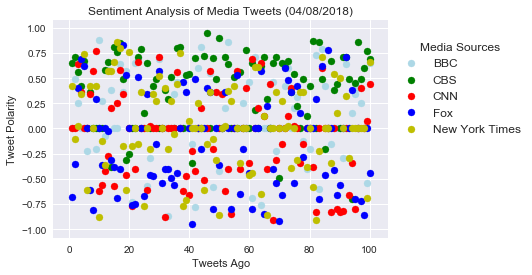

In [77]:
# Gathering the information from each media sources
BBC = sentiments_df.loc[sentiments_df["Media Sources"] == "@BBC"]
CBS = sentiments_df.loc[sentiments_df["Media Sources"] == "@CBS"]
CNN = sentiments_df.loc[sentiments_df["Media Sources"] == "@CNN"]
FOX = sentiments_df.loc[sentiments_df["Media Sources"] == "@FoxNews"]
NYT = sentiments_df.loc[sentiments_df["Media Sources"] == "@nytimes"]

# Creating scatter plots
plt.scatter(BBC['Tweets Ago'], BBC['Compound'], c ='lightblue', marker="o", label = 'BBC')
plt.scatter(CBS['Tweets Ago'], CBS['Compound'], c ='g', marker="o", label = 'CBS')
plt.scatter(CNN['Tweets Ago'], CNN['Compound'], c ='r', marker="o", label = 'CNN')
plt.scatter(FOX['Tweets Ago'], FOX['Compound'], c ='b', marker="o", label = 'Fox')
plt.scatter(NYT['Tweets Ago'], NYT['Compound'], c ='y', marker="o", label = 'New York Times')

# Plotting title and labels, and saving the figure into a png
sns.set()
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(bbox_to_anchor=(1, 0.95), title='Media Sources', fontsize = 'medium')
plt.savefig("Sentiment Analysis of Media Tweets.png", bbox_inches = "tight")
sns.set
plt.show()

In [78]:
# Creating and displaying a new dataframe to group by Media Source and Compound score
new_score = pd.DataFrame(sentiments_df.groupby("Media Sources")["Compound"].mean())
new_score

,Compound
Media Sources,
@BBC,0.091746
@CBS,0.369603
@CNN,-0.072494
@FoxNews,-0.123029
@nytimes,0.025116


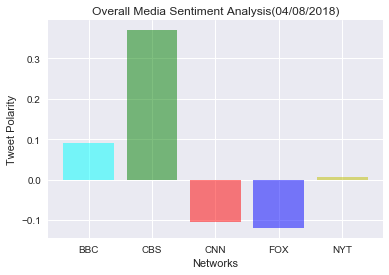

In [47]:
# Gathering and plotting of the compound score by news outlet and saving the image into png
x_axis = np.arange(len(new_score["Compound"]))
compound_score = new_score["Compound"]
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])
plt.bar(x_axis, compound_score, color = ['cyan','g','r','b','y'], alpha=0.5, align="edge")
plt.xlabel("Networks")
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Analysis(%s)" % (time.strftime("%m/%d/%Y")))
plt.savefig("Overall Media Sentiment Analysis.png", bbox_inches = "tight")
sns.set()
plt.show()